In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

In [2]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
for col in data.columns:
    print(col)
    print("Number of Unique values:", data[col].nunique())
    print(data[col].unique())
    print('-'*30)

Pregnancies
Number of Unique values: 17
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
------------------------------
Glucose
Number of Unique values: 136
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
------------------------------
BloodPressure
Number of Unique values: 47
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
---------------------

In [4]:
average_glucose = data[data['Glucose']>0]['Glucose'].mean()
data['Glucose'] = data['Glucose'].replace(0, average_glucose)

average_bloodpressure = data[data['BloodPressure']>0]['BloodPressure'].mean()
data['BloodPressure'] = data['BloodPressure'].replace(0, average_bloodpressure)

average_skinthickness = data[data['SkinThickness']>0]['SkinThickness'].mean()
data['SkinThickness'] = data['SkinThickness'].replace(0, average_skinthickness)

average_insulin = data[data['Insulin']>0]['Insulin'].mean()
data['Insulin'] = data['Insulin'].replace(0, average_insulin)

average_bmi = data[data['BMI']>0]['BMI'].mean()
data['BMI'] = data['BMI'].replace(0, average_bmi)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [5]:
len(data)

768

In [6]:
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

In [8]:
import matplotlib.pyplot as plt

In [61]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


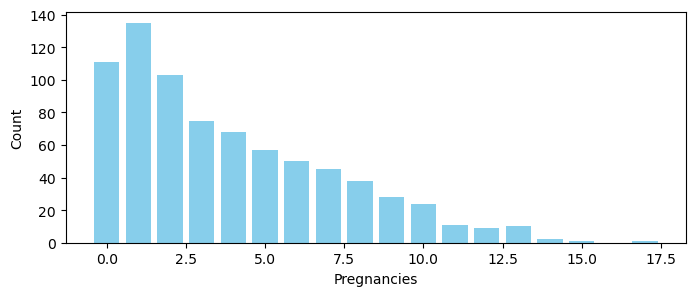

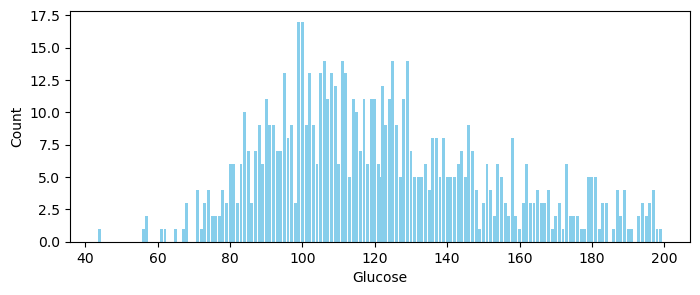

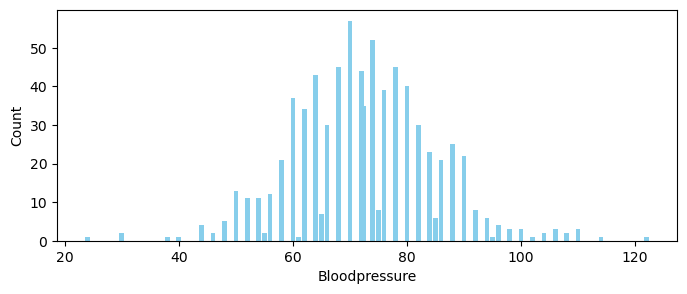

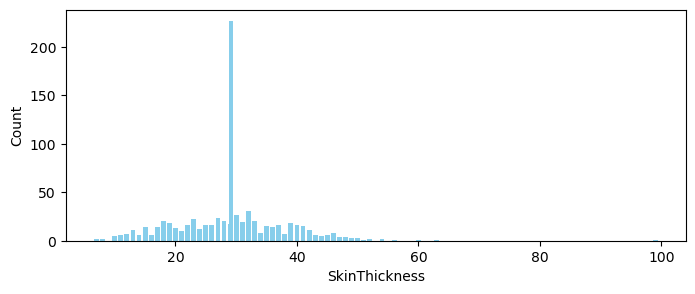

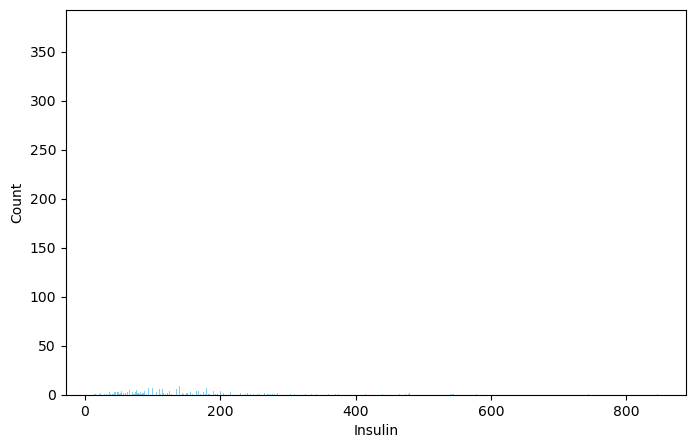

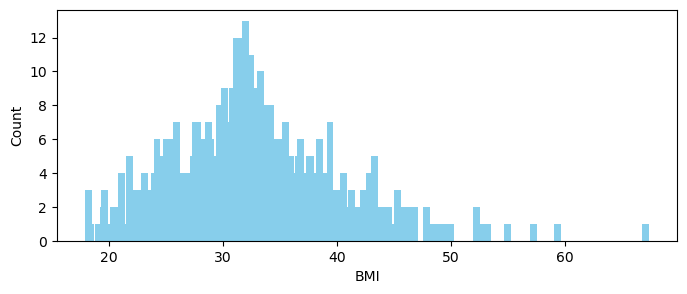

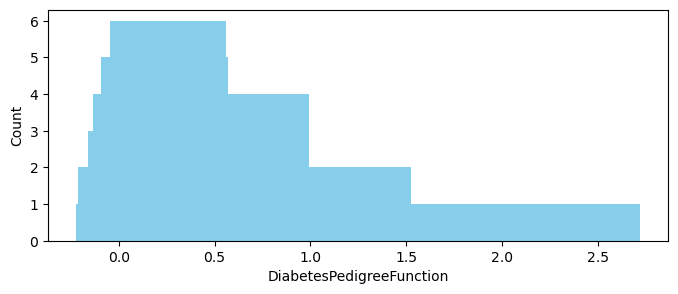

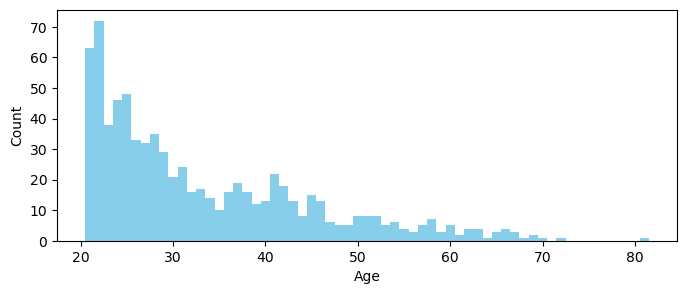

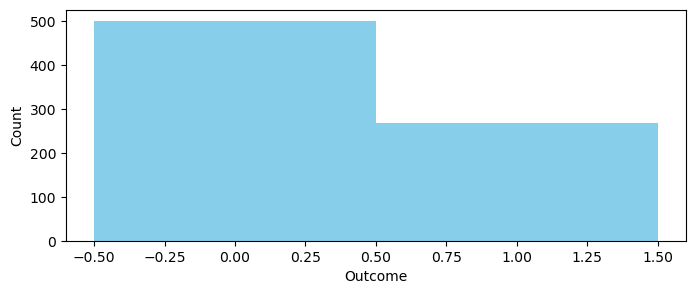

In [9]:
pregnancies_count = data['Pregnancies'].value_counts().sort_index()
plt.figure(figsize = (8, 3))
plt.bar(pregnancies_count.index, pregnancies_count.values, width=0.8, color="skyblue")
plt.xlabel("Pregnancies")
plt.ylabel("Count")
plt.show()

glucose_count = data['Glucose'].value_counts().sort_index()
plt.figure(figsize = (8, 3))
plt.bar(glucose_count.index, glucose_count.values, width=0.8, color="skyblue")
plt.xlabel("Glucose")
plt.ylabel("Count")
plt.show()

bloodpressure_count = data['BloodPressure'].value_counts().sort_index()
plt.figure(figsize = (8, 3))
plt.bar(bloodpressure_count.index, bloodpressure_count.values, width=0.8, color="skyblue")
plt.xlabel("Bloodpressure")
plt.ylabel("Count")
plt.show()

skinthickness_count = data['SkinThickness'].value_counts().sort_index()
plt.figure(figsize = (8, 3))
plt.bar(skinthickness_count.index, skinthickness_count.values, width=0.8, color="skyblue")
plt.xlabel("SkinThickness")
plt.ylabel("Count")
plt.show()

insulin_count = data['Insulin'].value_counts().sort_index()
plt.figure(figsize = (8, 5))
plt.bar(insulin_count.index, insulin_count.values, width=0.8, color="skyblue")
plt.xlabel("Insulin")
plt.ylabel("Count")
plt.show()

bmi_count = data['BMI'].value_counts().sort_index()
plt.figure(figsize = (8, 3))
plt.bar(bmi_count.index, bmi_count.values, width=0.6, color="skyblue")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

diabetes_count = data['DiabetesPedigreeFunction'].value_counts().sort_index()
plt.figure(figsize = (8, 3))
plt.bar(diabetes_count.index, diabetes_count.values, width=0.6, color="skyblue")
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Count")
plt.show()

age_count = data['Age'].value_counts().sort_index()
plt.figure(figsize = (8, 3))
plt.bar(age_count.index, age_count.values, width=1, color="skyblue")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
outcome_count = data['Outcome'].value_counts().sort_index()
plt.figure(figsize = (8, 3))
plt.bar(outcome_count.index, outcome_count.values, width=1, color="skyblue")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
dev_data, final_test = train_test_split(data, test_size=0.2, random_state=42)

In [21]:
print(f"Total samples: {len(data)}")
print(f"Model development samples: {len(dev_data)}")
print(f"Final test samples: {len(final_test)}")

Total samples: 768
Model development samples: 614
Final test samples: 154


In [22]:
x = dev_data.drop(columns=["Outcome"])
y = dev_data["Outcome"]
print(x.head())
print(y.head())

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
60             2     84.0      72.405184       29.15342  155.548223   
618            9    112.0      82.000000       24.00000  155.548223   
346            1    139.0      46.000000       19.00000   83.000000   
294            0    161.0      50.000000       29.15342  155.548223   
231            6    134.0      80.000000       37.00000  370.000000   

           BMI  DiabetesPedigreeFunction  Age  
60   32.457464                     0.304   21  
618  28.200000                     1.282   50  
346  28.700000                     0.654   22  
294  21.900000                     0.254   65  
231  46.200000                     0.238   46  
60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy_score = accuracy_score(y_test, y_pred)
print("The accuracy is:", accuracy_score)

The accuracy is: 0.7723577235772358


In [28]:
x1 = final_test.drop(columns=["Outcome"])
y1 = final_test["Outcome"]
print(x1.head())
print(y1.head())

y_pred = model.predict(x1)
accuracy_score = accuracy_score(y1, y_pred)
print("The accuracy is:", accuracy_score)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
668            6     98.0           58.0       33.00000  190.000000  34.0   
324            2    112.0           75.0       32.00000  155.548223  35.7   
624            2    108.0           64.0       29.15342  155.548223  30.8   
690            8    107.0           80.0       29.15342  155.548223  24.6   
473            7    136.0           90.0       29.15342  155.548223  29.9   

     DiabetesPedigreeFunction  Age  
668                     0.430   43  
324                     0.148   21  
624                     0.158   21  
690                     0.856   34  
473                     0.210   50  
668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64


TypeError: 'float' object is not callable

In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[77, 19],
       [27, 31]], dtype=int64)

In [14]:
print(data["Outcome"].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64
